In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


In [106]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
%matplotlib inline


In [107]:
df_train_original=pd.read_csv("/kaggle/input/credit-score-classification/train.csv")

/tmp/ipykernel_42/885916587.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original=pd.read_csv("/kaggle/input/credit-score-classification/train.csv")


In [108]:
df_train=df_train_original.copy()

In [109]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [110]:
df_train.shape

(100000, 28)

In [111]:
print('Train Data Size:',df_train.shape)

Train Data Size: (100000, 28)


In [112]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [114]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [115]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [116]:
def get_column_details(df,column):
    print("Details of",column,"column")
    print("\nDataType: ",df[column].dtype)
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
    print("\nNumber of Unique Values: ",df[column].nunique())    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())


In [117]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    palette = "deep" 
    sns.set_palette(palette)
    sns.countplot(data=df, x=column)
    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)
    plt.show()

In [118]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    palette = "deep" 
    sns.set_palette(palette)
    sns.displot(data=df, x=column, kde=True, bins=bins)
    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)
    plt.show()

In [119]:
def plot_stacked_bar(df,column,user_friendly_column_name,rotation=0,bins=20):
    palette = "deep" 
    sns.set_palette(palette)
    sns.displot(data=df, x=column, kde=True, bins=bins)
    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)
    plt.show()

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


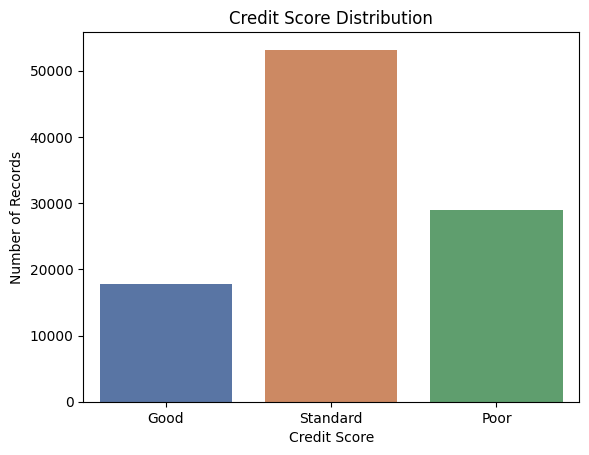

In [120]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name)

In [121]:
get_column_details(df_train,'ID')

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  100000

Distribution of column:

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64


In [122]:
get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


In [123]:

df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()


Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


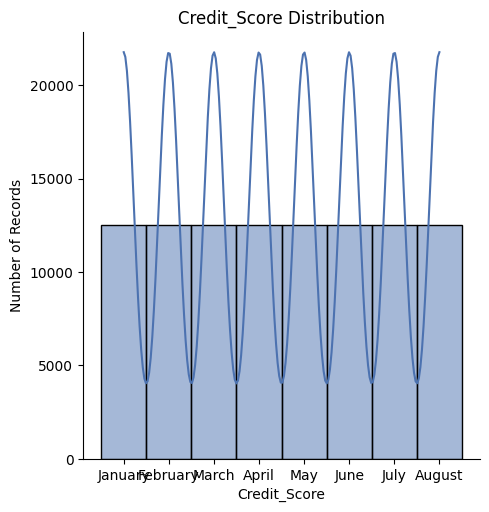

In [124]:
column_name = 'Month'
get_column_details(df_train,column_name)
plot_stacked_bar(df_train,column_name,'Credit_Score')


In [125]:
y=df_train.iloc[:,0].values
x=df_train.iloc[:,1:28].values

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [127]:

import pandas as pd
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month


In [128]:
column_name = 'Name'
group_by = 'Customer_ID'
get_column_details(df_train,column_name)


Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64


Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


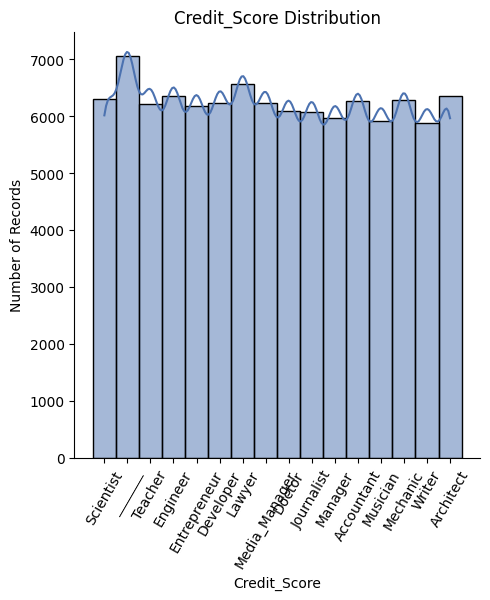

In [129]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'
get_column_details(df_train,column_name)
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)


In [130]:
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified,

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64


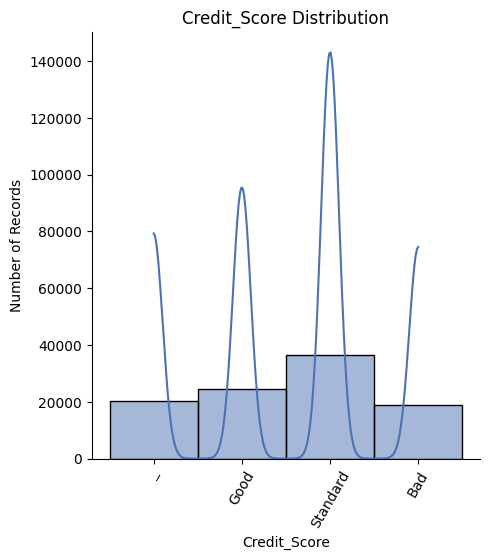

In [131]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'
get_column_details(df_train,column_name)
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


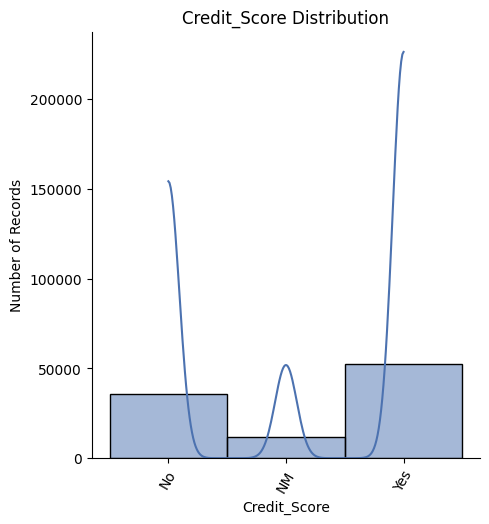

In [132]:
column_name = 'Payment_of_Min_Amount'
get_column_details(df_train,column_name)
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)